# 数据集介绍：

cifar10是彩色图片数据集，每张图片大小为32*32，内置的；

其中分10类：每类中训练的有5000张，测试的有1000张。所以总训练集中有50000张，总测试集中有10000张。

标签是“顺序编码”，即0 - 9这十种类比。类别有：飞机、汽车、鸟、猫、鹿、狗、青蛙、马、船、卡车

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
cifar = keras.datasets.cifar10

(train_image, train_label), (test_image, test_label) = cifar.load_data()

In [3]:
# 预处理的图片形状已经非常好了！
train_image.shape, test_image.shape, train_label.shape, test_label.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
train_image[0].shape

(32, 32, 3)

# 数据集预处理

神经网络喜欢“**数值比较小**”的数！对于三通道的rgb图像，每个像素值都是在[0,255]之间，这有些大了，我们要“**归一化**”：

In [5]:
train_image = train_image / 255
test_image = test_image / 255

# 网络搭建

In [6]:
model = keras.Sequential()

In [7]:
from keras import layers

In [8]:
model.add( layers.Conv2D( filters=64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ) )
model.add( layers.MaxPooling2D() )  # 还是用默认即可
model.add( layers.Conv2D( filters=64, kernel_size = (3,3), activation = 'relu' ) )
model.add( layers.MaxPooling2D() )  

# 全连接：
model.add( layers.Flatten() )  
model.add(layers.Dense(256, activation='relu'))
model.add( layers.Dropout(0.5) )
model.add(layers.Dense(10, activation='softmax'))  # 最后是10分类输出，激活用softmax多分类

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [10]:
model.compile( optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['acc']
)

In [11]:
history = model.fit( train_image, train_label, epochs = 20, batch_size=256, validation_data=(test_image, test_label) )


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 48s 963us/step - loss: 1.7057 - acc: 0.3778 - val_loss: 1.3883 - val_acc: 0.5013
Epoch 2/20
50000/50000 [==============================] - 47s 947us/step - loss: 1.3440 - acc: 0.5190 - val_loss: 1.2493 - val_acc: 0.5623
Epoch 3/20
50000/50000 [==============================] - 47s 942us/step - loss: 1.2144 - acc: 0.5696 - val_loss: 1.0746 - val_acc: 0.6237
Epoch 4/20
50000/50000 [==============================] - 47s 943us/step - loss: 1.1189 - acc: 0.6060 - val_loss: 1.0168 - val_acc: 0.6410
Epoch 5/20
50000/50000 [==============================] - 47s 943us/step - loss: 1.0424 - acc: 0.6332 - val_loss: 0.9780 - val_acc: 0.6583
Epoch 6/20
50000/50000 [==============================] - 47s 948us/step - loss: 0.9923 - acc: 0.6526 - val_loss: 0.9338 - val_acc: 0.6743
Epoch 7/20
50000/50000 [==============================] - 47s 945us/step - loss: 0.9420 - acc: 0.6712 - val_loss: 0

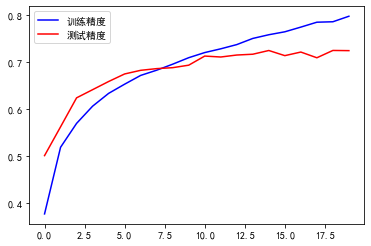

In [12]:
# 图像绘制：
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
# plt.ylim( ymin=0.8 )
plt.legend()

In [13]:
model.evaluate(train_image, train_label)

50000/50000 [==============================] - 13s 252us/step


[0.4060838068675995, 0.8712599873542786]

In [14]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 3s 254us/step


[0.8063052418708802, 0.7236999869346619]